In [1]:
# Packages to run the code


import sympy as sp

## Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import fsolve


from scipy.stats import binom

from scipy.integrate import quad

## Calculations
import numpy as np

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [2]:
L = 0.34*10**4

kT = 4.1

C = 110

A = 50

In [3]:
def Ea(n,f):
    return 2*np.pi**2*C*kT*n**2/L-f*L 

def Eb(n,f):
    Rc = np.sqrt(kT*A/(2*f))
    return kT*A*np.pi/Rc+C*kT/L*2*np.pi**2*(n-1)**2-f*(L-2*np.pi*Rc)

def intersection(x,y,g):
    idx = np.argwhere(np.isclose(y, g, atol=10)).reshape(-1)
    return idx

<IPython.core.display.Javascript object>


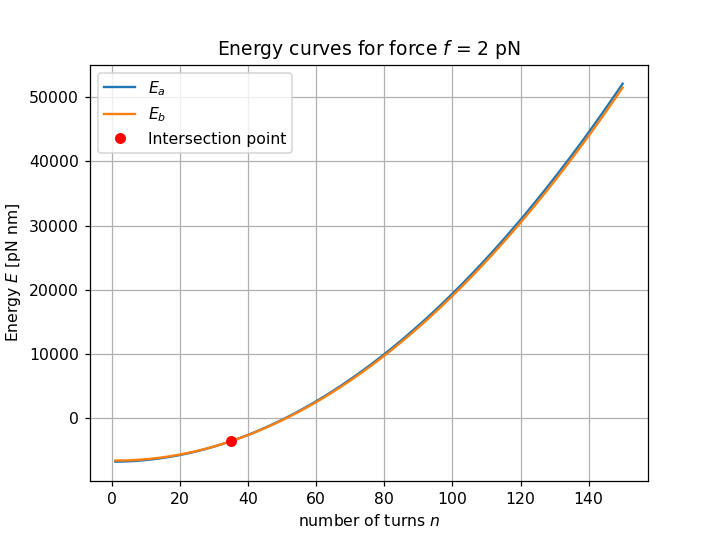

In [4]:
f = 2

n = np.linspace(1,150,2000)

fig, ax = plt.subplots(1,1)
    
ax.plot(n, Ea(n, f), label = '$E_{a}$')

ax.plot(n, Eb(n,f), label = '$E_{b}$')

nc = np.argwhere(np.diff(np.sign(Ea(n,f) - Eb(n,f)))).flatten()
plt.plot(n[nc], Ea(n,f)[nc], 'ro', label = 'Intersection point')

plt.title(r'Energy curves for force $f$ = ' + str(f) + ' pN')

plt.xlabel(r'number of turns $n$')
plt.ylabel(r'Energy $E$ [pN nm]')

plt.grid()
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


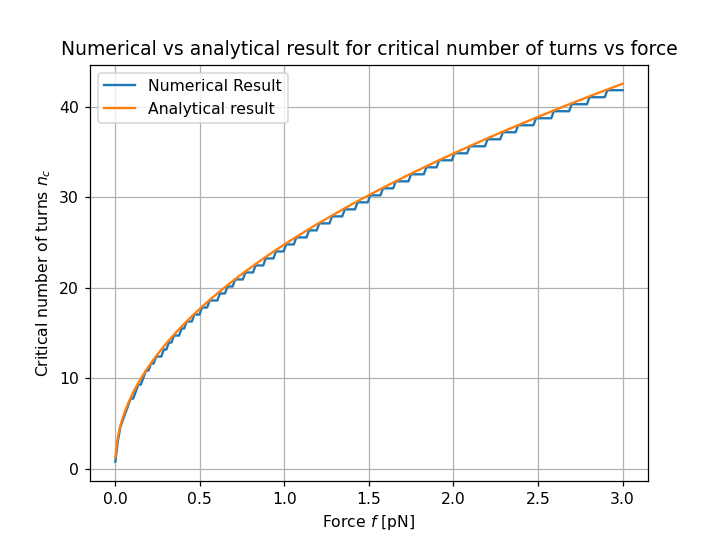

In [5]:
F = np.linspace(0.001,3,200)
n = np.linspace(0,100,130)
nc = []

for i in range(len(F)):
    nc.append(np.argwhere(np.diff(np.sign(Ea(n,F[i]) - Eb(n,F[i])))).flatten()[0])

fig, ax = plt.subplots(1,1)

ax.plot(F, n[nc], label = 'Numerical Result')
ax.plot(F, 1/2+L/(np.pi*C)*np.sqrt(A*F/(2*kT)), label = 'Analytical result')

plt.xlabel(r'Force $f$ [pN]')
plt.ylabel(r'Critical number of turns $n_{c}$')
plt.title('Numerical vs analytical result for critical number of turns vs force')

plt.grid()
plt.legend()

plt.show()

In [6]:
def z(n,f):
    nc = 1/2+L/(np.pi*C)*np.sqrt(A*f/(2*kT))
    Rc = np.sqrt(kT*A/(2*f))
    if n < nc:
        return L
    else:
        return L-2*np.pi*Rc*(n-nc)

<IPython.core.display.Javascript object>


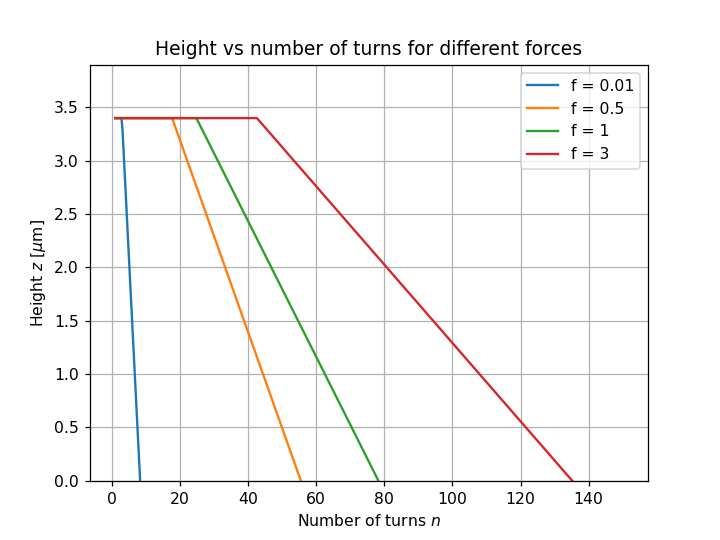

In [7]:
n = np.linspace(1,150,500)
f = [0.01, 0.5,1,3]

fig, ax = plt.subplots(1,1)

for i in range(len(f)):
    ax.plot(n, [z(a,f[i])/1000 for a in n], label = 'f = ' + str(f[i]))

plt.xlabel(r'Number of turns $n$')
plt.ylabel(r'Height $z$ [$\mu$m]')
plt.title('Height vs number of turns for different forces')

plt.grid()
plt.legend()

plt.ylim(0, z(1,f[i])/1000+0.5)

plt.show()

In [8]:
def r1(s):
    return R*np.cos(s/np.sqrt(R**2+(l/(2*np.pi))**2))
def r2(s):
    return R*np.sin(s/np.sqrt(R**2+(l/(2*np.pi))**2))
def r3(s):
    return l*s/(2*np.pi*np.sqrt(R**2+(l/(2*np.pi))**2))
def u(s):
    return 1/np.sqrt(R**2+(l/(2*np.pi))**2)*np.array([-R*np.sin(s/np.sqrt(R**2+(l/(2*np.pi))**2)),R*np.cos(s/np.sqrt(R**2+(l/(2*np.pi))**2)), l/(2*np.pi)])
def n(s):
    return np.array([-np.cos(s/np.sqrt(R**2+(l/(2*np.pi))**2)),-np.sin(s/np.sqrt(R**2+(l/(2*np.pi))**2)), 0])
def b(s):
    return 1/np.sqrt(R**2+(l/(2*np.pi))**2)*np.array([l/(2*np.pi)*np.sin(s/np.sqrt(R**2+(l/(2*np.pi))**2)),-l/(2*np.pi)*np.cos(s/np.sqrt(R**2+(l/(2*np.pi))**2)), R])


In [9]:
R = 1
l = 0.25

<IPython.core.display.Javascript object>


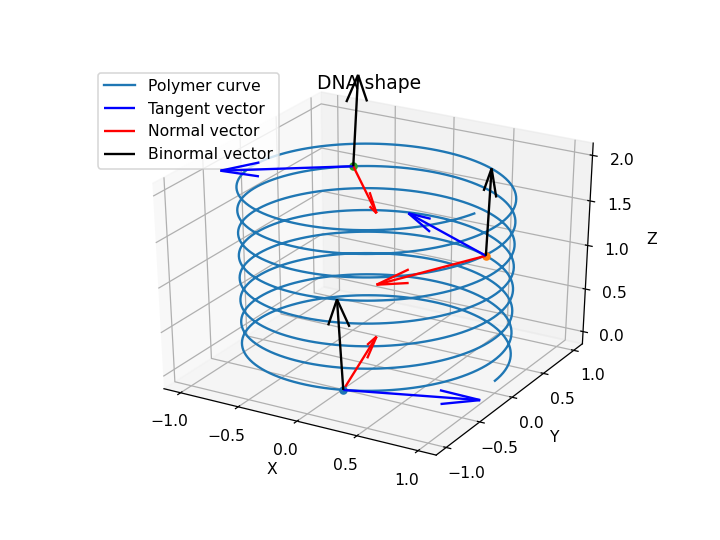

In [10]:
x = np.linspace(0,50,1000)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='z', nbins=6)


k = [5,20,40]

ax.plot3D(r1(x), r2(x), r3(x), label = 'Polymer curve')


soa = np.array([[r1(k[0]), r2(k[0]), r3(k[0]), u(k[0])[0], u(k[0])[1], u(k[0])[2]], [r1(20), r2(20), r3(20), u(20)[0], u(20)[1], u(20)[2]],
                [r1(40), r2(40), r3(40), u(40)[0], u(40)[1], u(40)[2]]])

X, Y, Z, U, V, W = zip(*soa)


ax.quiver(X, Y, Z, U, V, W, color = 'blue', label = 'Tangent vector')

soa = np.array([[r1(k[0]), r2(k[0]), r3(k[0]), n(k[0])[0], n(k[0])[1], n(k[0])[2]], [r1(20), r2(20), r3(20), n(20)[0], n(20)[1], n(20)[2]],
                [r1(40), r2(40), r3(40), n(40)[0], n(40)[1], n(40)[2]]])

X, Y, Z, U, V, W = zip(*soa)


ax.quiver(X, Y, Z, U, V, W, color = 'red', label = 'Normal vector')

soa = np.array([[r1(k[0]), r2(k[0]), r3(k[0]), b(k[0])[0], b(k[0])[1], b(k[0])[2]], [r1(20), r2(20), r3(20), b(20)[0], b(20)[1], b(20)[2]],
                [r1(40), r2(40), r3(40), b(40)[0], b(40)[1], b(40)[2]]])

X, Y, Z, U, V, W = zip(*soa)


ax.quiver(X, Y, Z, U, V, W, color = 'black', label = 'Binormal vector')

ax.scatter(r1(5), r2(5), r3(5))
ax.scatter(r1(20), r2(20), r3(20))
ax.scatter(r1(40), r2(40), r3(40))


#ax.plot3D(omega1*omega3/omega**2*x, -1+0*x, omega3**2/omega**2*x, label = 'Symmetry axis')
#ax.scatter(0+0*x,-1/omega1+0*x,0+0*x, color = 'red', label = 'Center of the circle')

plt.title('DNA shape')

plt.legend(loc = 'upper left')
#ax.set_zlim(-1,1)


plt.show()

In [11]:
def f(x):
    return np.sinc(x)
def kappa(x):
    return np.gradient(np.gradient(f(x), delta),delta)/(1+(np.gradient(f(x), delta))**2)**(3/2)
def t1(x):
    return 1+0*x
def t2(x):
    return np.gradient(f(x),delta)
def n(x):
    return 1/kappa(x)*np.gradient(np.gradient(f(x), delta),delta)

<IPython.core.display.Javascript object>


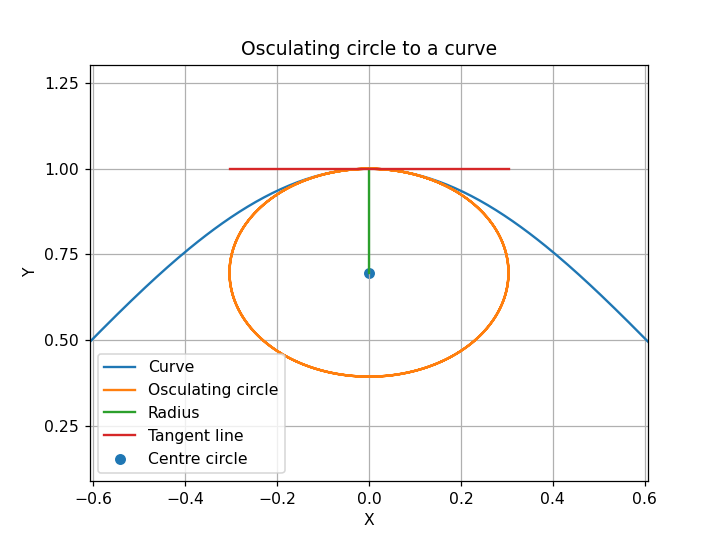

In [12]:
begin = -2
end = 4
pieces = 1000

delta = (end-begin)/pieces

x = np.linspace(begin, end, pieces)

fig, ax = plt.subplots(1,1)

#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.locator_params(axis='y', nbins=6)


ax.plot(x,f(x), label = 'Curve')


point = 333
s0 = x[point]

R = 1/kappa(x)[point]


ax.plot(s0+R*np.sin((x-s0)/R), f(x)[point]+R*n(x)[point]-R*np.cos((x-s0)/R)*n(x)[point]+R*np.sin((x-s0)/R)*t2(x)[point], label = 'Osculating circle')

ax.scatter(s0, f(x)[point]+R*n(x)[point], label = 'Centre circle')

plt.plot([s0,s0],[f(x)[point], f(x)[point]+R*n(x)[point]], label = 'Radius')

plt.plot([s0-R,s0+R],[f(x)[point], f(x)[point]], label = 'Tangent line')

#ax.set_aspect( 1 )

plt.xlim(s0-2*abs(R),s0+2*abs(R))
plt.ylim(f(x)[point]+R*n(x)[point]-2*abs(R), f(x)[point]+R*n(x)[point]+2*abs(R))

plt.grid()

plt.title('Osculating circle to a curve')

plt.legend(loc = 'lower left')


plt.show()

In [13]:
omega1 = 1
omega3 = 0.2
omega = np.sqrt(omega1**2+omega3**2)

In [14]:
def rx(s):
    return omega1*omega3/omega**2*s-omega1*omega3*np.sin(omega*s)/omega**3
def ry(s):
    return -(1-np.cos(omega*s))*omega1/omega**2
def rz(s):
    return omega3**2/omega**2*s+omega1**2*np.sin(omega*s)/omega**3

<IPython.core.display.Javascript object>


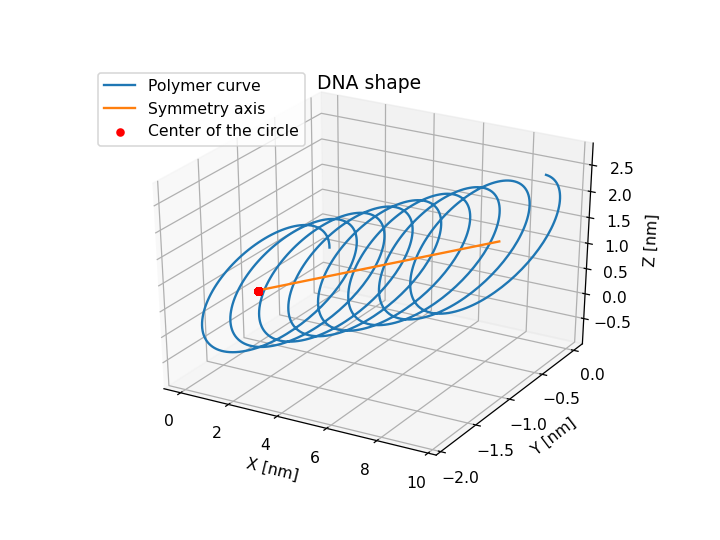

In [15]:
x = np.linspace(0,50,1000)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X [nm]')
ax.set_ylabel('Y [nm]')
ax.set_zlabel('Z [nm]')

plt.locator_params(axis='y', nbins=6)


ax.plot3D(rx(x), ry(x), rz(x), label = 'Polymer curve')
ax.plot3D(omega1*omega3/omega**2*x, -1/omega**2+0*x, omega3**2/omega**2*x, label = 'Symmetry axis')
ax.scatter(0+0*x,-1/omega1+0*x,0+0*x, color = 'red', label = 'Center of the circle')

plt.title('DNA shape')

plt.legend(loc = 'upper left')

plt.show()

In [16]:
def theta(s,p):
    return np.arccos(-l(p)+(l(p)+1)*np.tanh(np.sqrt(f*(1+l(p))/(2*kb))*abs(s))**2)
def phi2(s,p):
    return p/(2*kb)*(s+2*np.sqrt((1+l(p))/(1-l(p)))*np.arctan( (np.exp(s*gamma(p))-l(p))/np.sqrt(1-l(p)**2) ))
def phi(s,p):
    return p/(2*kb)*(s+np.sqrt(2*kb/(f*(1-l(p))))*np.arctan(np.sqrt((1+l(p))/(1-l(p)))*np.tanh(s*np.sqrt(f*(1+l(p))/(2*kb)))))
def ex(s,p): # x component of e3
    return np.sin(theta(s,p))*np.cos(phi2(s,p))
def ey(s,p): # y component of e3
    return np.sin(theta(s,p))*np.sin(phi2(s,p))
def ez(s,p): # z component of e3
    return np.cos(theta(s,p))
def l(p):
    return 1-p**2/(2*kb*f)
def gamma(p):
    return np.sqrt(2*f/kb*(1+l(p)))

In [17]:
f = 1
#p = [5,8,11, 12, 13,14]

p = [0.1,1,5,10,13]

L = 0.34*10**4

kT = 1

C = 110

A = 50

kb = A*kT
ds = 0.001

x = [0]
y = [0]
z = [0]
s = np.linspace(0,100,5000)

<IPython.core.display.Javascript object>


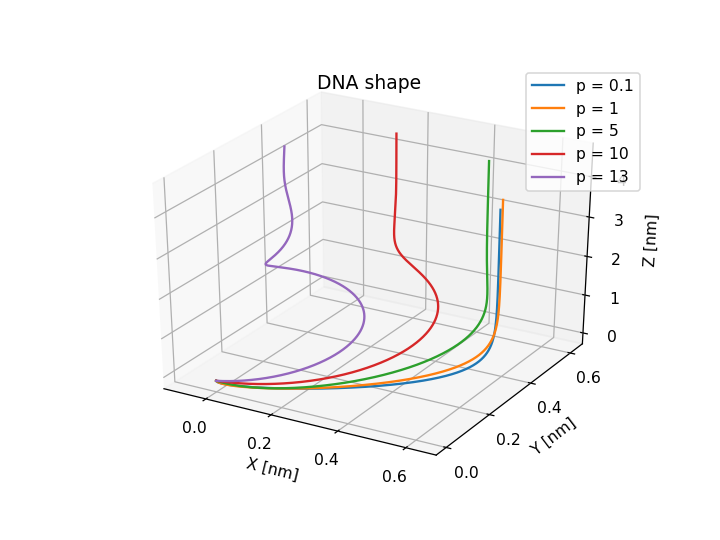

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for j in range(len(p)):
    x = [0]
    y = [0]
    z = [0]
    for i in range(1, len(s)):
        x.append(x[i-1]+ex(s[i],p[j])*ds)
        y.append(y[i-1]+ey(s[i], p[j])*ds)
        z.append(z[i-1]+ez(s[i], p[j])*ds)

    ax.plot3D(x, y, z, label = 'p = ' + str(p[j]))

plt.title('DNA shape')

plt.legend(loc = 'upper right')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X [nm]')
ax.set_ylabel('Y [nm]')
ax.set_zlabel('Z [nm]')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)

plt.show()

<IPython.core.display.Javascript object>


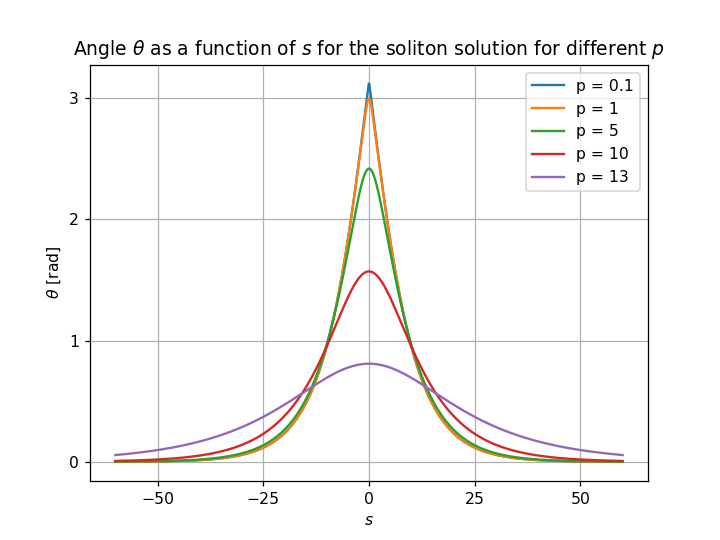

In [19]:
s = np.linspace(-60,60,1000)

fig, ax = plt.subplots(1,1)


for j in range(len(p)):
    plt.plot(s, theta(s, p[j]), label = 'p = ' + str(p[j]))
plt.title(r'Angle $\theta$ as a function of $s$ for the soliton solution for different $p$')

plt.grid()

plt.legend(loc = 'upper right')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('$s$')
ax.set_ylabel(r'$\theta$ [rad]')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)

plt.show()

<IPython.core.display.Javascript object>


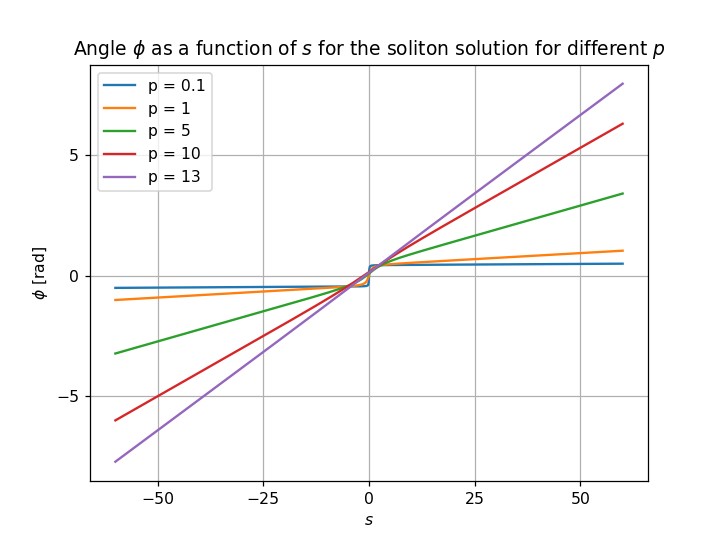

In [20]:

s = np.linspace(-60,60,1000)

fig, ax = plt.subplots(1,1)


for j in range(len(p)):
    plt.plot(s, phi2(s, p[j]), label = 'p = ' + str(p[j]))
plt.title(r'Angle $\phi$ as a function of $s$ for the soliton solution for different $p$')

plt.grid()

plt.legend(loc = 'upper left')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('$s$')
ax.set_ylabel(r'$\phi$ [rad]')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)

plt.show()

In [21]:
def S(sigma):
    return -a+b/2*sigma**2
def P(sigma):
    return c/2*sigma**2

<IPython.core.display.Javascript object>


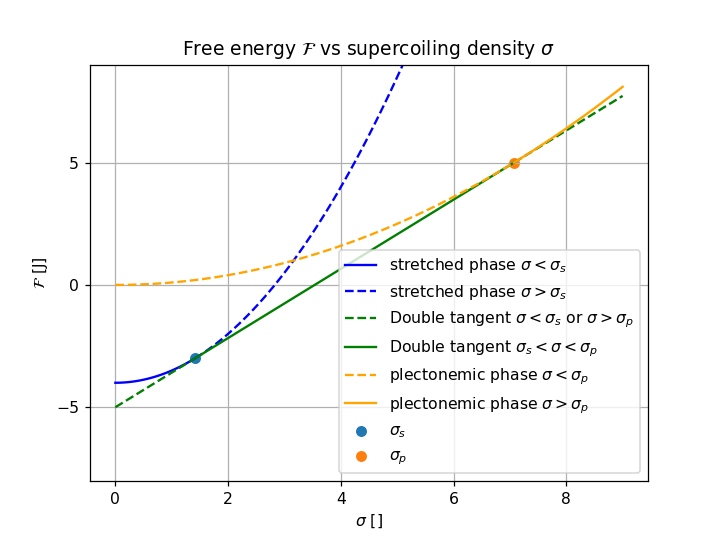

In [22]:
a = 4
b = 1
c = 0.2

sigmas = np.sqrt(2*a*c/(b*(b-c)))
sigmap = np.sqrt(2*a*b/(c*(b-c)))
end = 9

sigma1 = np.linspace(0,sigmas,100)
sigma2 = np.linspace(sigmas, sigmap, 100)
sigma3 = np.linspace(sigmap, end,100)

sigma4 = np.linspace(sigmas, end,100)
sigma5 = np.linspace(0, sigmap, 100)

fig, ax = plt.subplots(1,1)

plt.grid()

plt.plot(sigma1,S(sigma1), label = r'stretched phase $\sigma < \sigma_s$', color = 'blue')
plt.plot(sigma4,S(sigma4), label = 'stretched phase $\sigma > \sigma_s$', linestyle = '--', color = 'blue')

plt.plot(sigma1,S(sigmas)+b*sigmas*(sigma1-sigmas), linestyle = '--', color = 'green', label = 'Double tangent $\sigma < \sigma_s$ or $\sigma > \sigma_p$' )
plt.plot(sigma2,S(sigmas)+b*sigmas*(sigma2-sigmas), color = 'green',label = 'Double tangent $ \sigma_s < \sigma < \sigma_p$' )
plt.plot(sigma3,S(sigmas)+b*sigmas*(sigma3-sigmas), linestyle = '--', color = 'green')

plt.plot(sigma5,P(sigma5), label = 'plectonemic phase $\sigma < \sigma_p$', linestyle = '--', color = 'orange')
plt.plot(sigma3,P(sigma3), label = 'plectonemic phase $\sigma > \sigma_p$', color = 'orange')


#plt.plot(sigma,P(sigma), label = 'plectonomic phase')
#plt.plot(sigma,S(sigmas)+b*sigmas*(sigma-sigmas) )

ax.scatter(sigmas, S(sigmas), label = r'$\sigma_s$')
ax.scatter(sigmap, P(sigmap), label = r'$\sigma_p$')

plt.ylim(-2*a,9)

plt.title(r'Free energy $\mathcal{F}$ vs supercoiling density $\sigma$')

plt.legend(loc = 'lower right')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('$\sigma \ []$')
ax.set_ylabel(r'$\mathcal{F}$ [J]')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)

plt.show()